# Model Building in Python

In this Notebook, we will learn how to find patterns in our variables and between our variables. We will also learn about Cross Validation techniques and why they are so important in stochastic/probabilistic models.

## Understanding the Data

Before creating a model, evaluating it and using it to try to make predictions, we need to know what information we have. Normally, within the data collected, we will have several variables that may or may not be good to include in our model.
The collected information will be stored in a dataset (database) tabularly ordered, either an excel file, a .csv, a .txt, or other formats.

When we do data analysis, we will operate on datasets similar to the example in the next slide, which, at the time of data collection, have been organized in a tabular form so that:

* Each column of the dataset must be a variable and each row an observation.
* Each observation will be a different measurement and, therefore, a different value of the variable to be observed.


In [21]:
import pandas as pd
mtcars = pd.read_csv("/content/drive/MyDrive/datasets/mtcars.csv", index_col=0)
mtcars.head(15)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


To make the discussion easier, let’s define some terms:

* A **variable** is a quantity, quality, or property that you can measure.
* A **value** is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.
* An **observation** is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable. I’ll sometimes refer to an observation as a data point.
* **Tabular data** is a set of values, each associated with a variable and an observation. Tabular data is tidy if each value is placed in its own “cell,” each variable in its own column, and each observation in its own row.

In real life, sometimes we are the ones who have to organize the data collected in a dataset. In the same way, we may come across a dataset where there are missing values, values that have been recorded incorrectly or values in a format that is not correct.

In order to be able to use this data, we must know how they have been measured and how the data have been recorded, so that we can subsequently clean and correct the dataset. Once we have the appropriate dataset, we will go on to explore the data we have so that we can analyze it and ask the most appropriate research questions. Through this analysis, we will also be able to make a selection of the variables to include in our model.

This process is known as Exploratory Data Analysis and is carried out after Data Cleansing. We will not see in this course how to do a cleaning and a exploratory data analysis of the variables of a dataset since you will see this content in many different courses during the degree, but we will study how to find patterns in the data that will be very helpful in order to define our models.
To be able to build our models and choose the right variables, we must know what questions to ask ourselves to understand how our data are related.

There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:
* What type of **variation** occurs within my variables?
* What type of **covariation** occurs between my variables?

## Variation Analysis

**Variation is the tendency of the values of a variable to change from measurement to measurement.**

You can see variation easily in real life; if you measure any continuous variable twice, you will get two different results. This is true even if you measure quantities that are constant, like the speed of light. Each of your measurements will include a small amount of error that varies from measurement to measurement. Categorical variables can also vary if you measure across different subjects (e.g. the eye colors of different people), or different times (e.g. the energy levels of an electron at different moments). 

Every variable has its own **pattern of variation**, which can reveal interesting information. The best way to understand that pattern is to visualize the distribution of the variable’s values.

### Discrete case

How you visualize the distribution of a variable will depend on whether the variable is **categorical** or **continuous**. A variable is categorical if it can only take one of a small set of values. In Python, categorical variables are usually saved as character vectors. To examine the distribution of a categorical variable, use a bar chart:


In [22]:
diamonds = pd.read_csv("/content/drive/MyDrive/datasets/diamonds.csv",index_col=0)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


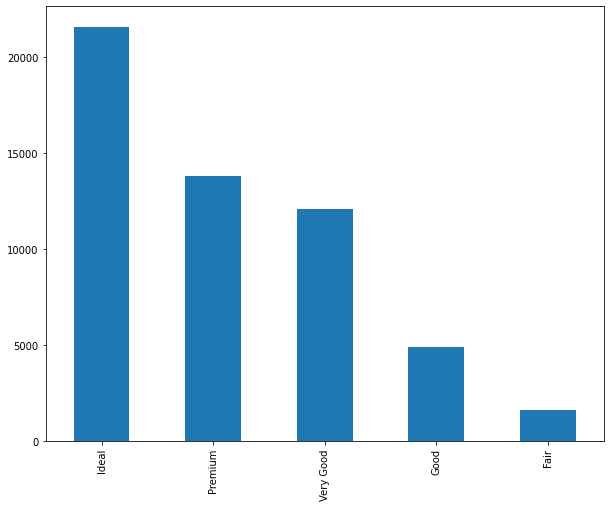

In [23]:
import matplotlib.pyplot as plt

diamonds["cut"].value_counts().plot.bar(figsize=(10,8)) # using .plot in pandas is the same as using matplotlib
plt.show()

In [24]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

### Continuous case

A variable is continuous if it can take any of an infinite set of ordered values. Numbers and date-times are two examples of continuous variables. To examine the distribution of a continuous variable, use a histogram:

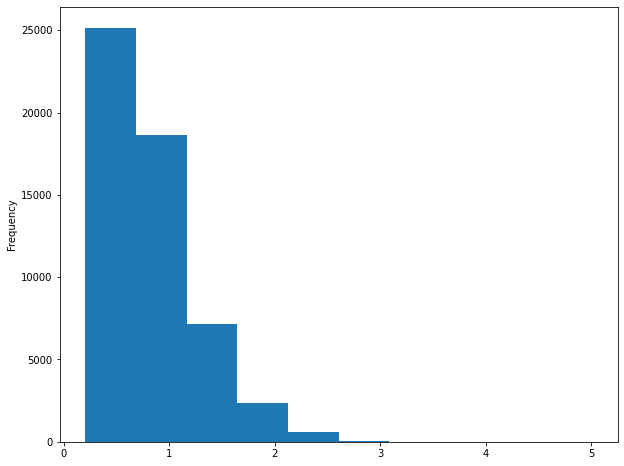

In [25]:
diamonds["carat"].plot.hist(figsize=(10,8))
plt.show()

A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin. In the graph above, the tallest bar shows that almost 20,000 observations have a carat value between 0 and 0.5, which are the left and right edges of the bar.

Now that you can visualize variation, what should you look for in your plots? And what type of follow-up questions should you ask? The key to asking good follow-up questions will be to rely on your curiosity (What do you want to learn more about?) as well as your skepticism (How could this be misleading?).

In both bar charts and histograms, tall bars show the common values of a variable, and shorter bars show less-common values. Places that do not have bars reveal values that were not seen in your data.

To turn this information into useful questions, look for anything unexpected:
* Which values are the most common? Why?
* Which values are rare? Why? Does that match your expectations?
* Can you see any unusual patterns? What might explain them?

As an example, the histogram below suggests several interesting questions:
* Why are there more diamonds at whole carats and common fractions of carats?
* Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?
* Why are there no diamonds bigger than 3 carats?



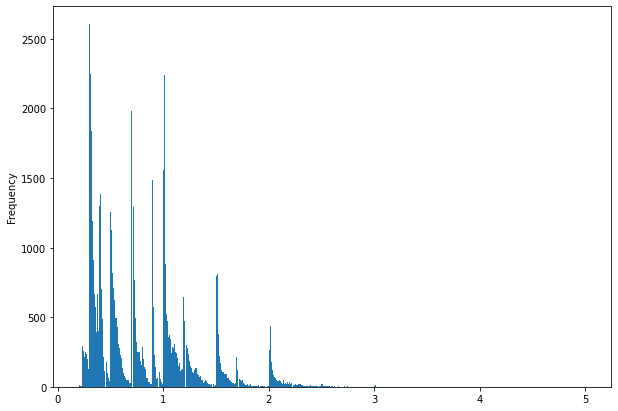

In [26]:
diamonds["carat"].plot.hist(bins = 500, figsize=(10,7))
plt.show()

Clusters of similar values suggest that subgroups exist in your data. To understand the subgroups, ask:
* How are the observations within each cluster similar to each other?
* How are the observations in separate clusters different from each other?
* How can you explain or describe the clusters?

Many of the questions above will prompt you to explore a relationship between variables, for example, to see if the values of one variable can explain the behavior of another variable.

## Covariation Analysis

If variation describes the behavior **within** a variable, covariation describes the behavior **between** variables. Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualise the relationship between two or more variables. How you do that should again depend on the type of variables involved.

### A categorical and a continuous variable

It’s common to explore the distribution of a continuous variable broken down by a categorical variable. For example, let’s explore how the price of a diamond varies with its quality:


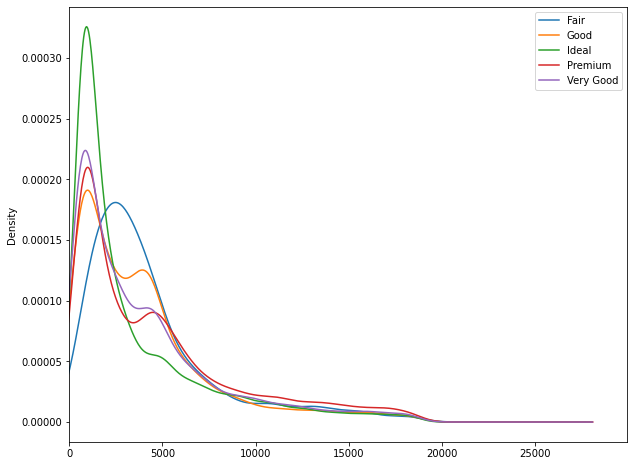

In [27]:
diamonds.groupby("cut")["price"].plot.density(legend=True, figsize=(10,8))
plt.xlim(left = 0)
plt.show()

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the boxplot. A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians. Each boxplot consists of:

* Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.
* A line (or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution.
* A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR). In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution. These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side


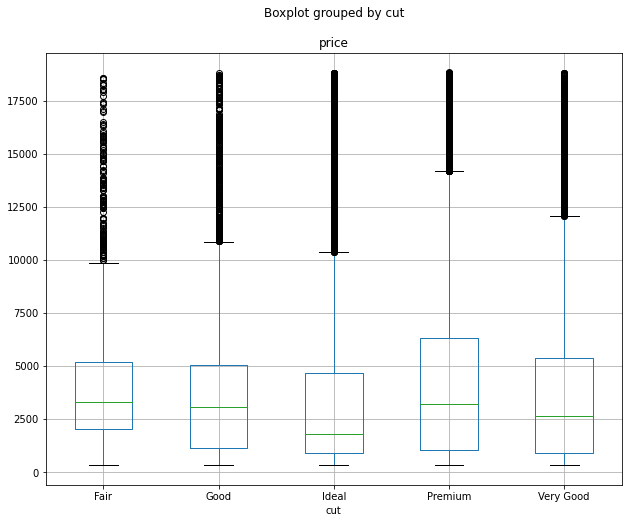

In [28]:
diamonds.boxplot(column=["price"], by = "cut", figsize=(10,8))
plt.show()

We see much less information about the distribution, but the boxplots are much more compact so we can more easily compare them (and fit more on one plot). 
It supports the counterintuitive finding that better quality diamonds are cheaper on average.

### Two categorical variables

To visualise the covariation between categorical variables, you’ll need to count the number of observations for each combination. We can do this using a cross table as follows:

In [29]:
CrosstabResult=pd.crosstab(index=diamonds["cut"],columns=diamonds["color"])
print(CrosstabResult)

color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678


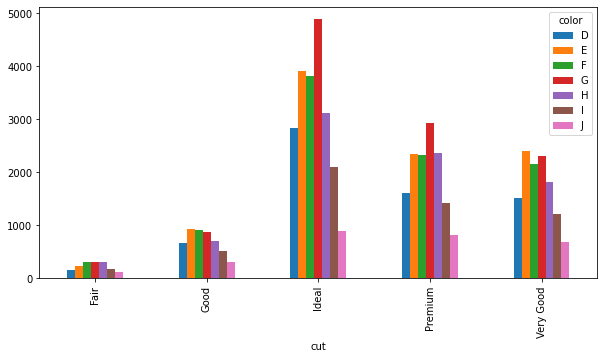

In [30]:
CrosstabResult.plot.bar(figsize = (10,5))
plt.show()

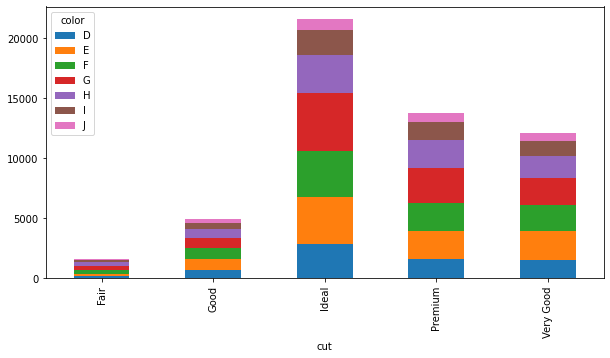

In [31]:
CrosstabResult.plot.bar(figsize = (10,5), stacked = True)
plt.show()


### Two continuous variables

To visualize the covariation between two continuous variables, draw a scatter plot.
Scatterplots become less useful as the size of your dataset grows, because points begin to overplot, and pile up into areas of uniform black (as below), but you can find alternatives and ways to solve this changing the parameters of the plot as you have learned in data viz.


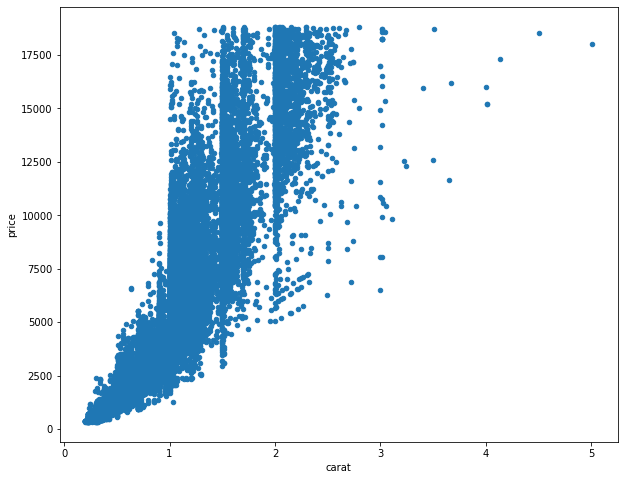

In [32]:
diamonds.plot.scatter(x = "carat", y = "price", figsize = (10,8))
plt.show()

## Paterns and Models

Patterns in your data provide clues about relationships. If a systematic relationship exists between two variables it will appear as a pattern in the data. If you spot a pattern, ask yourself:
* Could this pattern be due to coincidence (i.e. random chance)?
* How can you describe the relationship implied by the pattern?

Patterns in your data provide clues about relationships. If a systematic relationship exists between two variables it will appear as a pattern in the data. If you spot a pattern, ask yourself:
* How strong is the relationship implied by the pattern?
* What other variables might affect the relationship?
* Does the relationship change if you look at individual subgroups of the data?

Patterns provide one of the most useful tools in modeling because they reveal covariation. If you think of variation as a phenomenon that creates uncertainty, covariation is a phenomenon that reduces it. 

**If two variables covariate, you can use the values of one variable to make better predictions about the values of the second.** If the covariation is due to a causal relationship (a special case), then you can use the value of one variable to control the value of the second.

## Cross Validation

A common danger in modeling is overfitting. Overfitting happens when we create a model that behaves perfectly with our data, predicting a large percentage of the dependent variable, but when generalizing it is not able to predict the data that come from reality. On the other hand, underfitting occurs when we create a model that does not fit our data (our sample of the population), and therefore will not fit properly to the reality. In none of the cases we can say that our model is generalizable. To explain it in a less technical language, let’s give an example:

> *Imagine that you would like to move to Japan, and therefore you have decided to study the language from home.*

**Overfitting:**

> *You decide that you are going to see all the episodes of Dragon Ball to get an idea of the language before going to Japan. You repeat all the sagas of this series several times during a year, and once you know perfectly the language of the series you think you are ready to start your trip to Japan. You pack your bag and take the first flight, and when you arrive at Tokyo airport you have your first conversation with a Japanese person. You quickly realize that you don’t understand practically anything he’s saying to you, and every time you talk he looks at you strangely, as if you weren’t speaking the right way. You have trained your mind very well with specific data that is not able to be generalized to other contexts and situations, so it is not useful for your purpose. This would be a case of Overfitting.*

**Underfitting:**

> *You decide that you are going to read some of the Japanese dictionary before you leave. You spend two days reading the dictionary and the third day you take a flight to Tokyo. Obviously, when you arrive at Tokyo airport and start talking to a Japanese person, you don’t understand anything he says to you and you can’t articulate a word. You have trained your mind badly with very poor data, so although the words you have studied are used in more general contexts, you are not able to reach your goal. This would be a case of Underfitting.*

![](https://drive.google.com/uc?id=19xqrmOWMaAe9zyEk43SsKAb6VZeTFSyh)

In the graphs we can identify, on the left, the underfitted model, and on the right the overfitted model. But how could we solve this problem?

**Cross Validation:**

> *Let’s imagine that we find a bar in our city where we can talk to Japanese people to practice our language. If we follow the first strategy, the first time we get there the same thing will happen, but we will realize about our mistakes in a controlled environment and we have time to return home and train with other situations. This is called Cross Validation. We divide our data into training sets and test sets to check that our model not only works correctly with the data I use to train it, but also with new data that has nothing to do with the training set.*

To avoid the over and underfitting problems we will use cross validation techniques. In this section we will explain the four most important cross validation techniques. All of them can be summarized in the following steps:
* **Reserve** a small sample of the data set
* **Build** (or train) the model using the remaining part of the data set
* **Test** the effectiveness of the model on the the reserved sample of the data set. If the model works well on the test data set, then it’s good.

### Train/test split cross validation

Dividing a dataset into a training set and a testing set is a common and necessary operation when making a predictive model. It is important that we learn how to do this before we start creating any model. In general terms, an original dataset is usually divided into two sets: training and testing. Sometimes it is divided into a third subset called a validation set.

* **Training dataset:** This is the set with which we build the model. With this set we will calculate the parameters to obtain the equations that we will use later.
* **Testing dataset:** It is the set with which we check the effectiveness of our model. The equations and parameters of the original model are now used to calculate which is the output (Dependent Variable) based on the inputs of the testing set (Independent Variables). These outputs are used to compare the efficiency of the model, and see if it is really useful to predict or not the result.

![](https://drive.google.com/uc?id=1NqajB_ZmgceMthIj1AZ7hw0mWXAv01F6)

Generally, the training set and the testing set are divided using a ratio of 75%(training)-25%(testing) or even 80%-20%.
There are many ways to divide data into two sections. The easiest way is to take the first 75%-80% for training and the rest for testing. However, this method can lead to problems because the first rows come from a different data source than the middle and end rows, or because they are ordered by time and so the time factor is important in the model. These situations can lead to the final result of the model being deviated from what it should have been.

We will start using `sklearn` in the next session for modeling, but we need it for the cross validation methods too.

In [33]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
from sklearn.model_selection import train_test_split as tts
target = diamonds["price"]
predictors = diamonds.drop("price", axis=1)
predictors_train, predictors_test, target_train, target_test = tts(predictors, 
                                                                   target, 
                                                                   test_size = 0.25,
                                                                   random_state = 2023)

In [36]:
predictors_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
24145,1.51,Very Good,D,VS2,63.2,57.0,7.27,7.25,4.59
19694,0.30,Ideal,G,VS1,62.4,57.0,4.30,4.32,2.69
19083,1.30,Premium,H,VS1,61.5,58.0,6.98,6.96,4.29
30863,0.33,Premium,G,VS2,61.1,59.0,4.47,4.43,2.72
23278,1.20,Premium,E,VVS2,62.1,58.0,6.76,6.70,4.18


In [37]:
target_train.head()

24145    12311
19694      624
19083     7855
30863      743
23278    11301
Name: price, dtype: int64

This cross validation method is the most classic, and although it is still the most used, it is not the one that gives us the best results. Let’s look at two other methods that are a little more complex: **Leave one out cross validation (LOOCV)** and **K-fold cross validation**. Let’s see how each of them works and how to carry them out using the sklearn library.

### Leave one out cross validation (LOOCV)

This method works as follow:

1. Leave out one data point and build the model on the rest of the data set
2. Test the model against the data point that is left out at step 1 and record the test error associated with the prediction
3. Repeat the process for all data points
4. Compute the overall prediction error by taking the average of all these test error estimates recorded at step 2

![](https://drive.google.com/uc?id=1jQSi6iI6-vdgRDWWVJh1vA-196-vnhBD)

We’ll use the `LeaveOneOut` function from the library `sklearn` in order to use this cross validation technique when we build our models.

The advantage of the LOOCV method is that we make use all data points reducing potential bias. However, the process is repeated as many times as there are data points, resulting to a higher execution time when n is extremely large. Additionally, we test the model performance against one data point at each iteration. This might result to higher variation in the prediction error, if some data points are outliers.

Of course, we cannot manage that number of datasets manually, so we will use LOOCV in predefined sklearn functions when estimating our models. We will see an applied example just to understand how are we going to apply LOOCV.


In [48]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the cross validation technique and the model
cv = LeaveOneOut()
model = LinearRegression()

# Select the predictors and the target
target = mtcars["mpg"]
predictors = mtcars.drop("mpg", axis=1)

# Obtain the scores of the model
scores = cross_val_score(model, predictors, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# Compute the average score
np.mean(np.absolute(scores))

2.743759120653929

### K-fold cross validation

The k-fold cross-validation method evaluates the model performance on different subsets of the training data and then calculate the average prediction error rate. 

1. Randomly split the data set into k-subsets (or k-fold) (for example 5 subsets)
2. Reserve one subset and train the model on all other subsets
3. Test the model on the reserved subset and record the prediction error
4. Repeat this process until each of the k subsets has served as the test set.
5. Compute the average of the k recorded errors. This is called the cross-validation error serving as the performance metric for the model.

K-fold cross-validation (CV) is a robust method for estimating the accuracy of a model.

The most obvious advantage of k-fold CV compared to LOOCV is computational. A less obvious but potentially more important advantage of k-fold CV is that it often gives more accurate estimates of the test error rate than does LOOCV. Typical question, is how to choose right value of k?

Lower value of K is more biased and hence undesirable. On the other hand, higher value of K is less biased, but can suffer from large variability. It is not hard to see that a smaller value of k (say k = 2) always takes us towards the train-test approach, whereas a higher value of k (say k = number of data points) leads us to LOOCV approach.

In practice, one typically performs k-fold cross-validation using k’s between 5 and 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

We’ll use the `KFold` function from the library `sklearn` in order to use this cross validation technique when we build our models.





In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the cross validation technique and the model
cv = KFold(n_splits = 10)
model = LinearRegression()

# Select the predictors and the target
target = mtcars["mpg"]
predictors = mtcars.drop("mpg", axis=1)

# Obtain the scores of the model
scores = cross_val_score(model, predictors, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# Compute the average score
np.mean(np.absolute(scores))

3.591520381366082

### Repeated K-fold cross validation

The process of splitting the data into k-folds can be repeated a number of times, this is called repeated k-fold cross validation. The final model error is taken as the mean error from the number of repeats. Is generally recommended to use the (repeated) k-fold cross-validation to estimate the prediction error rate.

We’ll use the `RepeatedKFold` function from the library `sklearn` in order to use this cross validation technique when we build our models.

Obviously, you can alter the number of repeats and subsets as you like



In [52]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the cross validation technique and the model
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 2023)
model = LinearRegression()

# Select the predictors and the target
target = mtcars["mpg"]
predictors = mtcars.drop("mpg", axis=1)

# Obtain the scores of the model
scores = cross_val_score(model, predictors, target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# Compute the average score
np.mean(np.absolute(scores))

2.8312319149421206